# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from weather_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country= city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("skipping")
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | el calafate
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | paracuru
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | machico
Processing Record 9 of Set 1 | kitimat
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | ilhabela
Processing Record 12 of Set 1 | szczecinek
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | ust-tsilma
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | tromso
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | viedma
Processing Record 19 of Set 1 | madalena
Processing Record 20 of Set 1 | howrah
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | adamstown
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,297.14,30,75,7.72,US,1717874892
1,port mathurin,-19.6833,63.4167,297.13,78,40,9.97,MU,1717874892
2,el calafate,-50.3408,-72.2768,276.75,99,100,3.24,AR,1717874892
3,fale old settlement,-9.3852,-171.2468,301.62,71,85,2.42,TK,1717874892
4,paracuru,-3.4100,-39.0306,302.10,87,35,4.10,BR,1717874893


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,297.14,30,75,7.72,US,1717874892
1,port mathurin,-19.6833,63.4167,297.13,78,40,9.97,MU,1717874892
2,el calafate,-50.3408,-72.2768,276.75,99,100,3.24,AR,1717874892
3,fale old settlement,-9.3852,-171.2468,301.62,71,85,2.42,TK,1717874892
4,paracuru,-3.4100,-39.0306,302.10,87,35,4.10,BR,1717874893


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

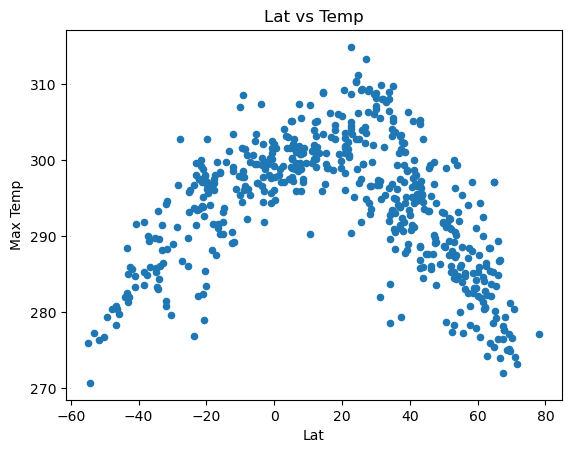

In [8]:
# Build scatter plot for latitude vs. temperature
temp_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Max Temp',title='Lat vs Temp')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

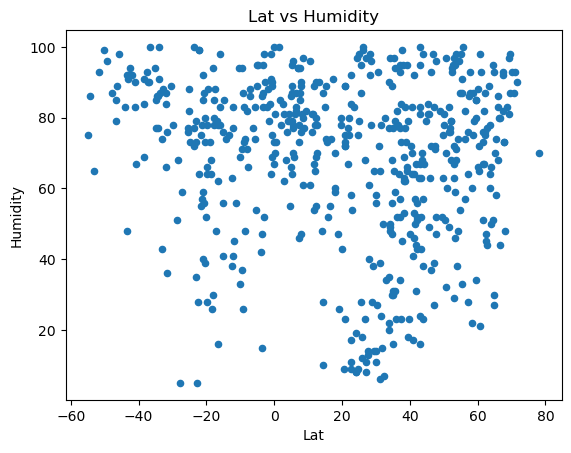

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Humidity',title='Lat vs Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

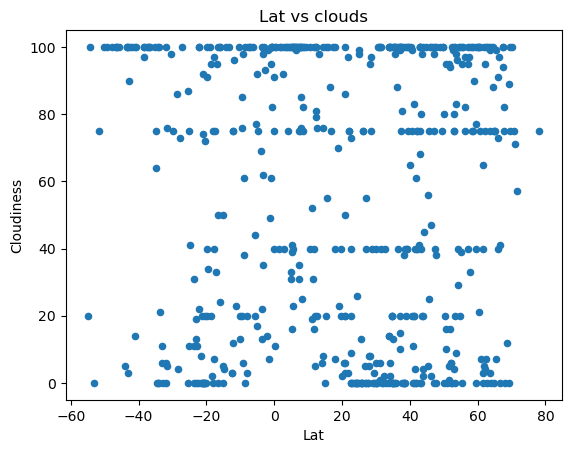

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloud_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',title='Lat vs clouds')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

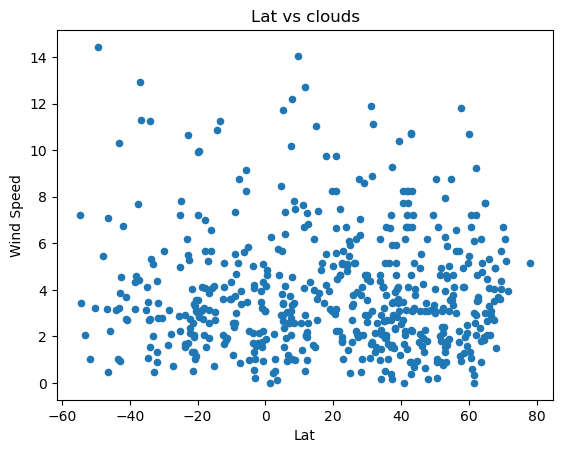

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter=city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed',title='Lat vs clouds')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linfunc(df,x_column,y_column):
    result = linregress(df[x_column], df[y_column])
    
    # Return regression parameters
    print(f"slope={result.slope},intercept= {result.intercept},ravlue= {result.rvalue}, pvalue={result.pvalue},stderr= {result.stderr}")



In [13]:
linfunc(city_data_df,'Lat','Lng')


slope=-0.032351708007132635,intercept= 15.681555976219924,ravlue= -0.011320411797376969, pvalue=0.791279371923389,stderr= 0.12218376294646449


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,297.14,30,75,7.72,US,1717874892
6,la passe,45.5549,-0.8967,293.28,81,25,4.92,FR,1717874893
7,machico,32.7000,-16.7667,295.38,80,40,1.54,PT,1717874893
8,kitimat,54.0524,-128.6534,299.36,38,96,1.89,CA,1717874893
11,szczecinek,53.7079,16.6994,290.12,68,98,4.52,PL,1717874893


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,297.13,78,40,9.97,MU,1717874892
2,el calafate,-50.3408,-72.2768,276.75,99,100,3.24,AR,1717874892
3,fale old settlement,-9.3852,-171.2468,301.62,71,85,2.42,TK,1717874892
4,paracuru,-3.4100,-39.0306,302.10,87,35,4.10,BR,1717874893
5,port alfred,-33.5906,26.8910,286.03,87,21,5.33,ZA,1717874893


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Linear regression on Northern Hemisphere
north_regress=linfunc(northern_hemi_df,'Max Temp','Lat')

slope=-1.5754476102898052,intercept= 500.7852366958181,ravlue= -0.735146213478125, pvalue=1.7810093618201377e-66,stderr= 0.07433095133767166


In [17]:
# Linear regression on Southern Hemisphere
south_regress=linfunc(southern_hemi_df,'Max Temp','Lat')

slope=1.4862986051307117,intercept= -456.2343310245756,ravlue= 0.784215624281375, pvalue=1.302266097995205e-35,stderr= 0.09211077665228849


The main takeaway from the regression analysis is that there is a statistically stong relationship between latitude and temp in both hemispheres/.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temperature (°C)')

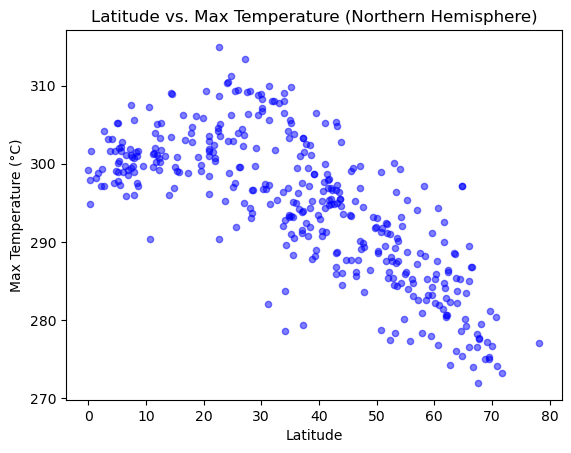

In [18]:
# Northern Hemisphere


# Scatter plot
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', color='blue', alpha=0.5)
plt.title('Latitude vs. Max Temperature (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
# Plot the regression line


# Add labels and title


# Show plot


Text(0, 0.5, 'Max Temperature (°C)')

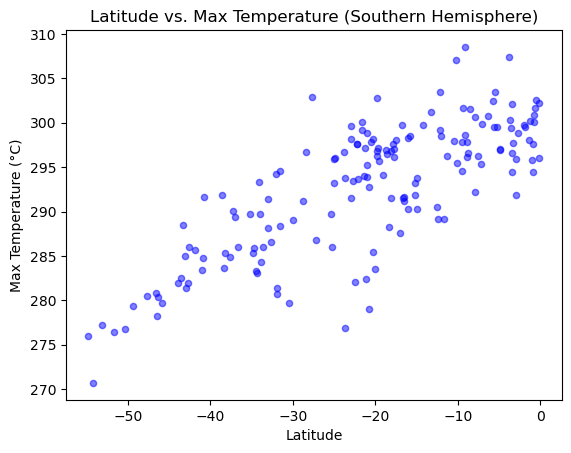

In [19]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', color='blue', alpha=0.5)
plt.title('Latitude vs. Max Temperature (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
# YOUR CODE HERE

this clearly illustrates temperature falling as you move further away from 0 in latitude. This applie to both hemispheres.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness')

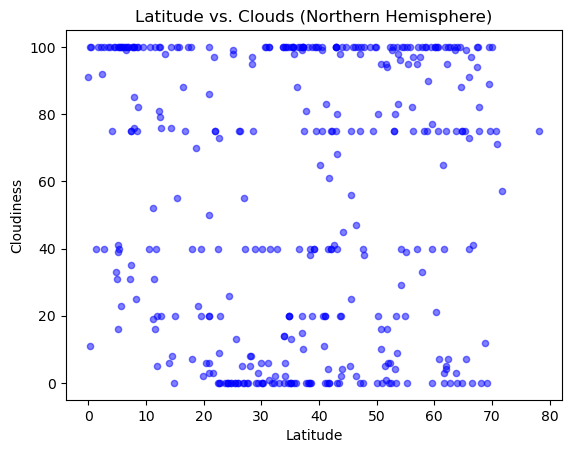

In [20]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', color='blue', alpha=0.5)
plt.title('Latitude vs. Clouds (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Cloudiness')

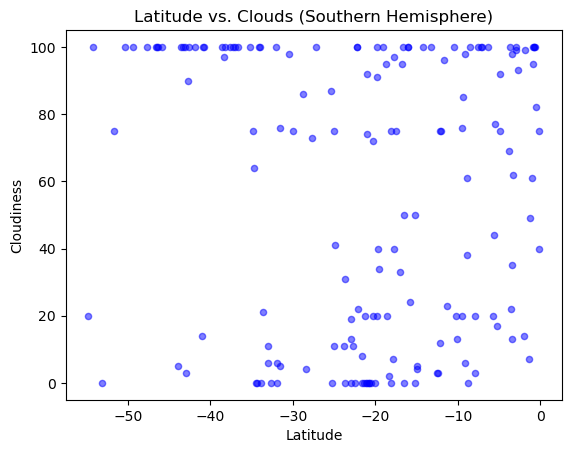

In [21]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', color='blue', alpha=0.5)
plt.title('Latitude vs. Clouds (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

This appears to show no correlation between clouds and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed')

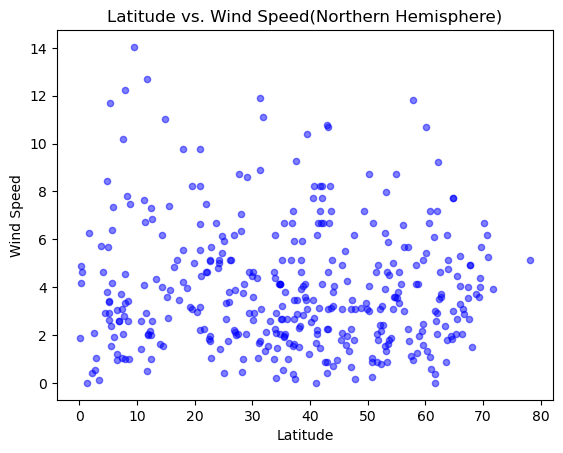

In [22]:
# Northern Hemisphere
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', color='blue', alpha=0.5)
plt.title('Latitude vs. Wind Speed(Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

Text(0, 0.5, 'Wind Speed')

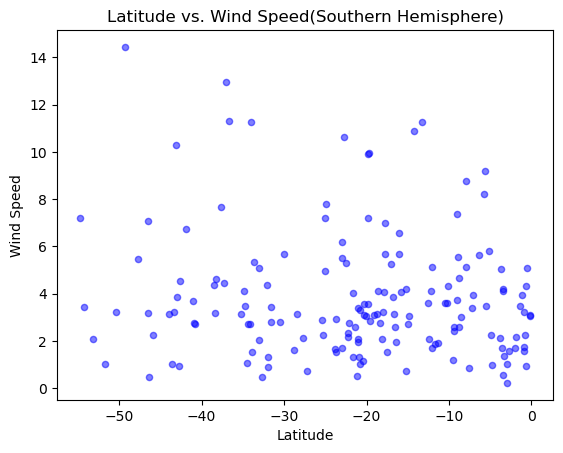

In [23]:
# Southern Hemisphere
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', color='blue', alpha=0.5)
plt.title('Latitude vs. Wind Speed(Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

This shows no correlation between lat and wind speed